In [1]:
from graph_generator import *
from algorithm_implementation import *

In [12]:
#The values of n and k can be changed in order to draw more conclusions
n = 100
k_values = list(range(0, 21, 2))

algorithms = [indegree, pagerank, hits]

graphs = []

random_graph = generate_random_graph(n, 0.5)
random_graph.name = "Random Graph"
graphs.append(random_graph)

regular_graph = generate_random_regular_graph(n, n - 7)
regular_graph.name = "Regular Graph"
graphs.append(regular_graph)

scale_free_graph = generate_scale_free_graph(n, n-7)
scale_free_graph.name = "Scale-free Graph"
graphs.append(scale_free_graph)

small_world_graph = generate_small_world_graph(n, 5, 0.75)
small_world_graph.name = "Small World Graph"
graphs.append(small_world_graph)

hierarchical_graph = generate_hierarchical_graph(random.randint(1, n), random.randint(1, n))
hierarchical_graph.name = "Hierarchical Graph"
graphs.append(hierarchical_graph)

completed_graph = generate_complete_graph(n)
completed_graph.name = "Completed Graph"
graphs.append(completed_graph)

grid_graph = generate_grid_graph(random.randint(1, n), random.randint(1, n))
grid_graph.name = "Grid Graph"
graphs.append(grid_graph)

cyclic_graph = generate_cyclic_graph(n)
cyclic_graph.name = "Cyclic Graph"
graphs.append(cyclic_graph)

bipartite_graph = generate_bipartite_graph(n)
bipartite_graph.name = "Bipartite Graph"
graphs.append(bipartite_graph)


#### What are the most vulnerable graphs you found, for each ranking algorithm?

The following code runs each algorithm for all types of graphs provided above for each k changes made (from 1 to k). For each k we calculate the rank difference and plot the results on a line graph.

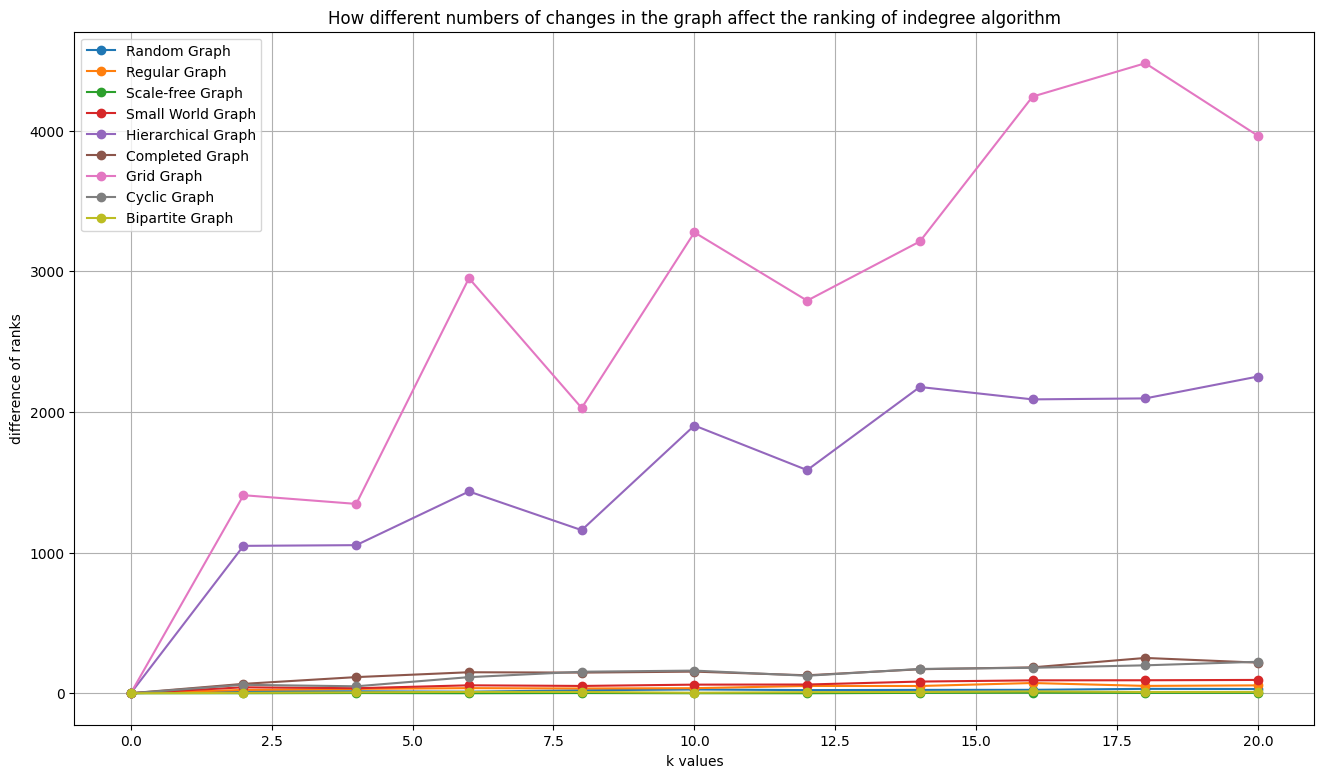

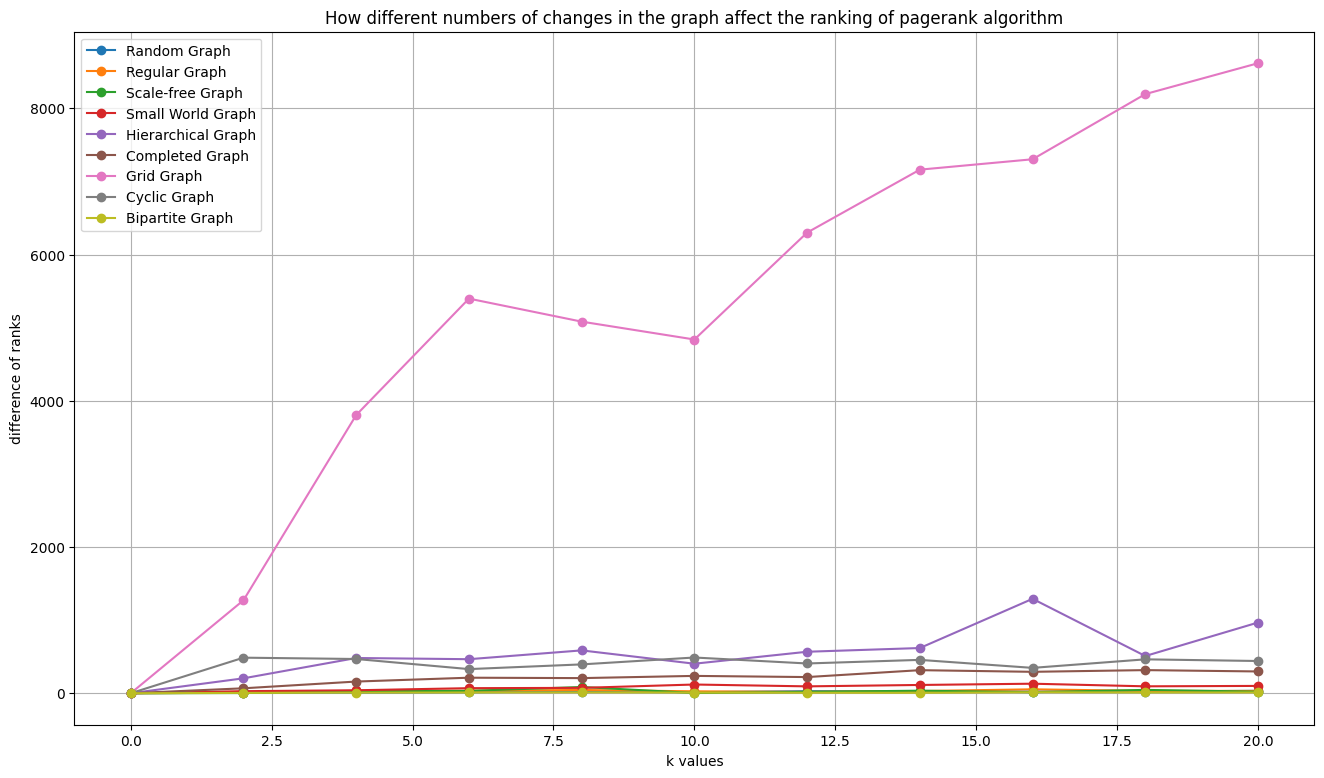

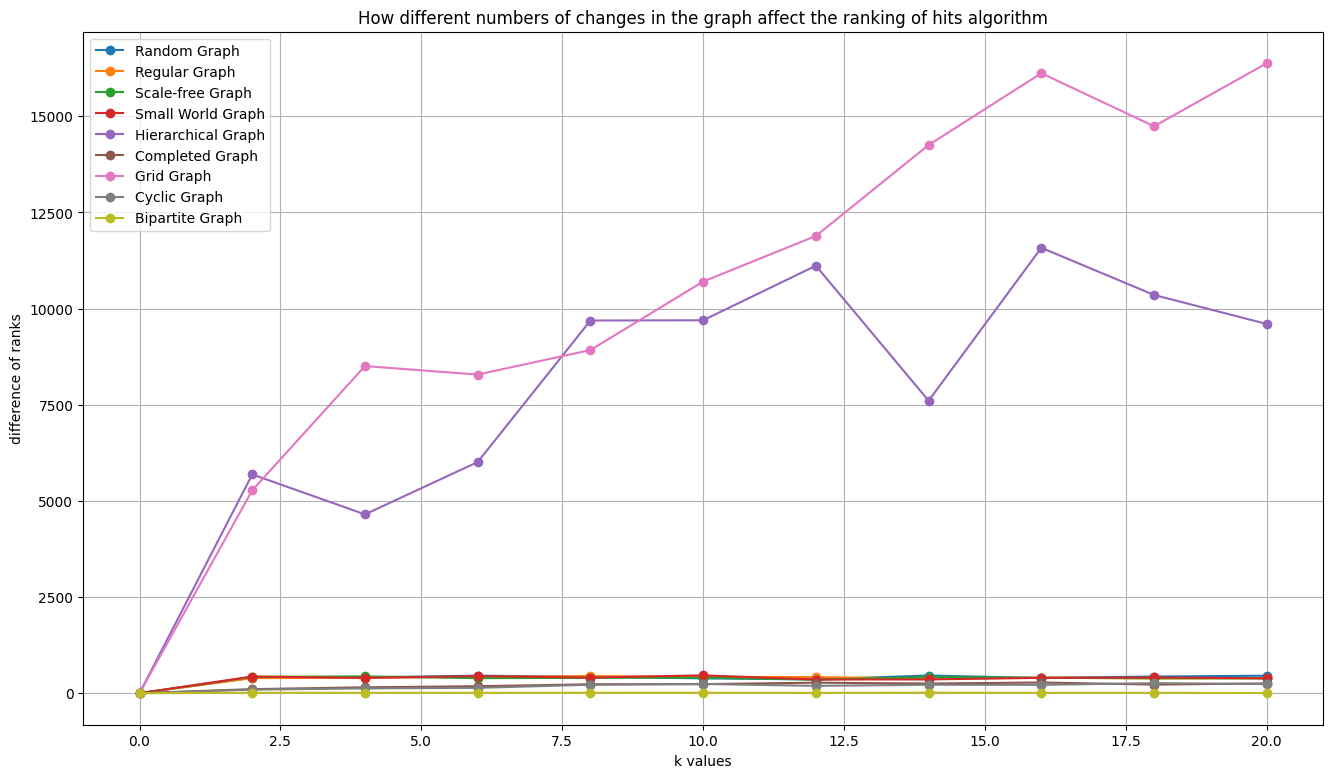

In [13]:
def plot_alg(make_change):
    for algorithm in algorithms:
        plt.figure(figsize=(16, 9))
        for g in graphs:
            values = []
            for k in k_values:
                if algorithm == hits:
                    rank1 = algorithm(g)
                else:
                    rank1 = ranks(algorithm(g))
                g1 = make_change(g, k)
                if algorithm == hits:
                    rank2 = algorithm(g1)
                else:
                    rank2 = ranks(algorithm(g1))
                value = diff_ranks(rank1, rank2)
                values.append(value)
            plt.plot(k_values, values, marker = 'o', label = g.name)
        plt.xlabel("k values")
        plt.ylabel("difference of ranks")
        plt.legend()
        plt.title("How different numbers of changes in the graph affect the ranking of " + algorithm.__name__ + " algorithm")
        plt.grid(True)
        plt.show()
        
plot_alg(make_change) 

#### What type of link change mattered most?

##### We test changes that are only adding edges

We create a function that adds k edges to a graph and then plot the algorithms only by adding edges.

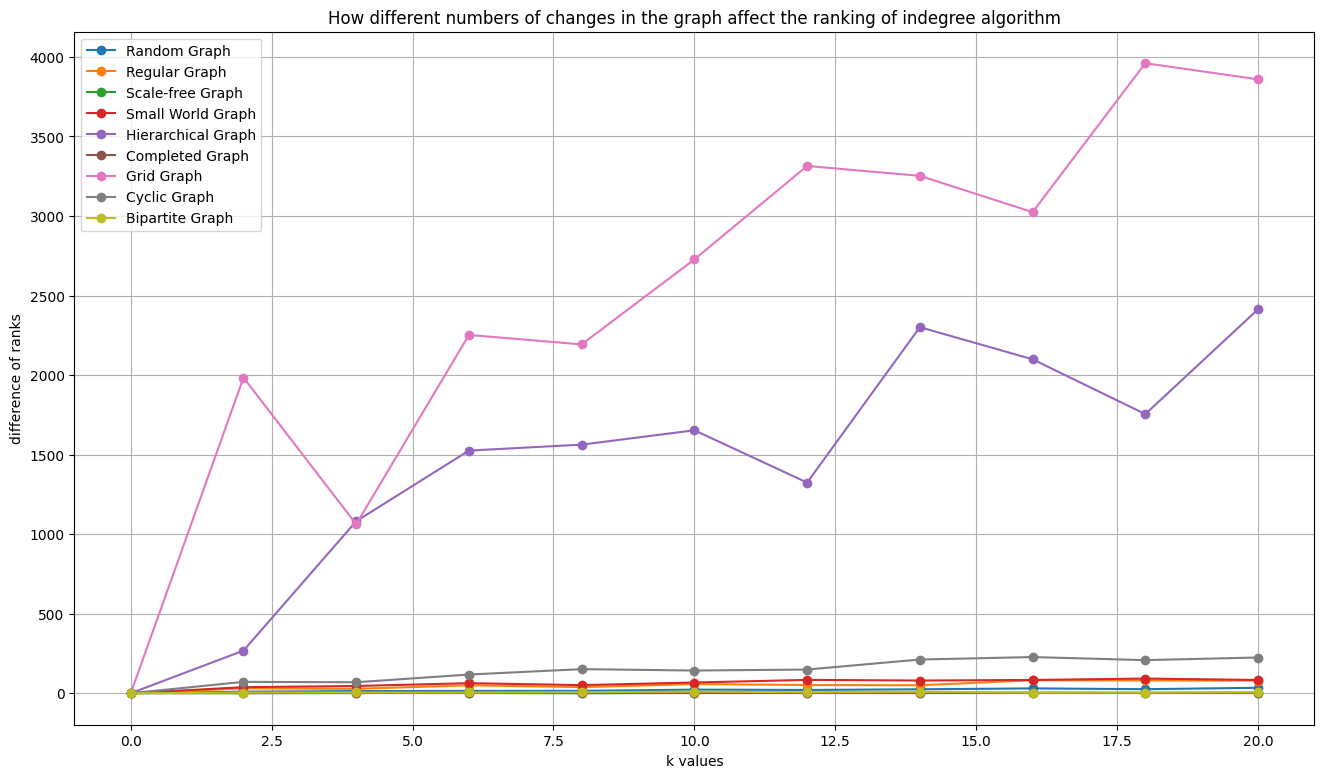

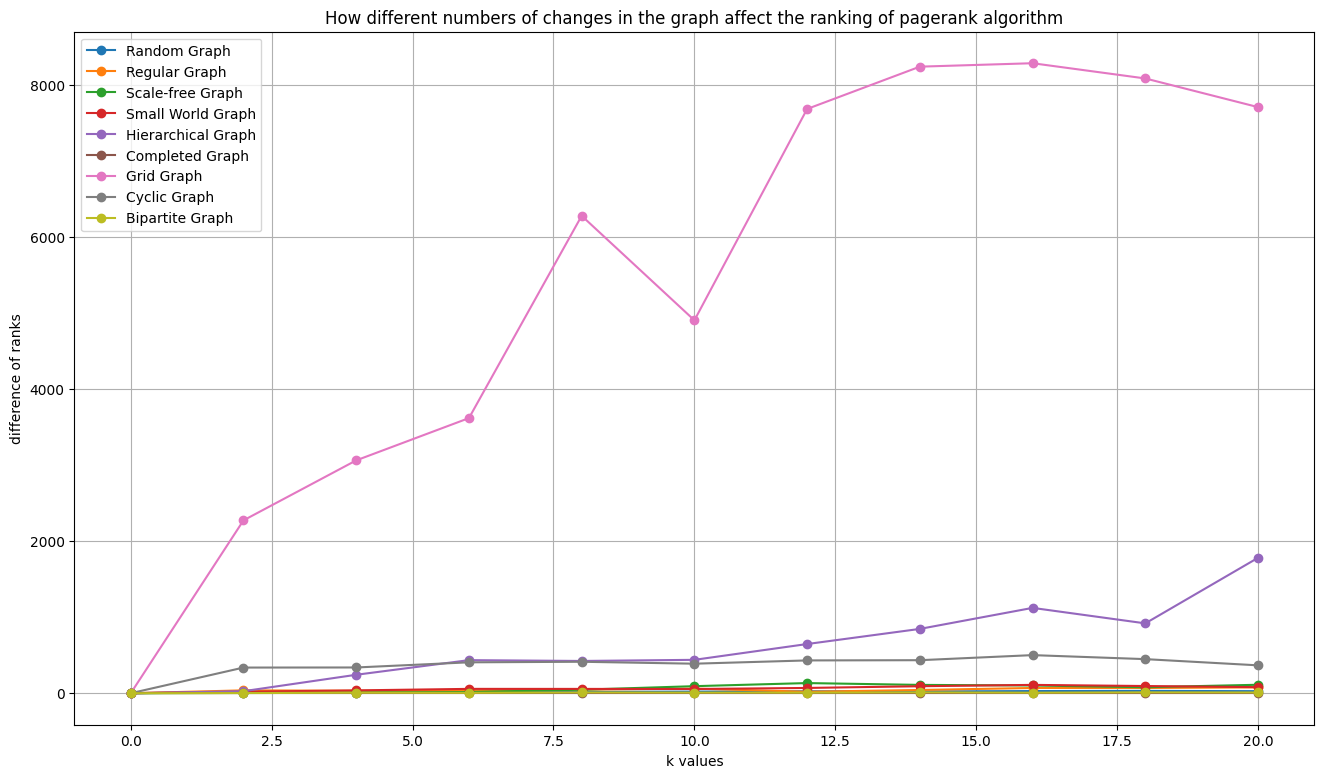

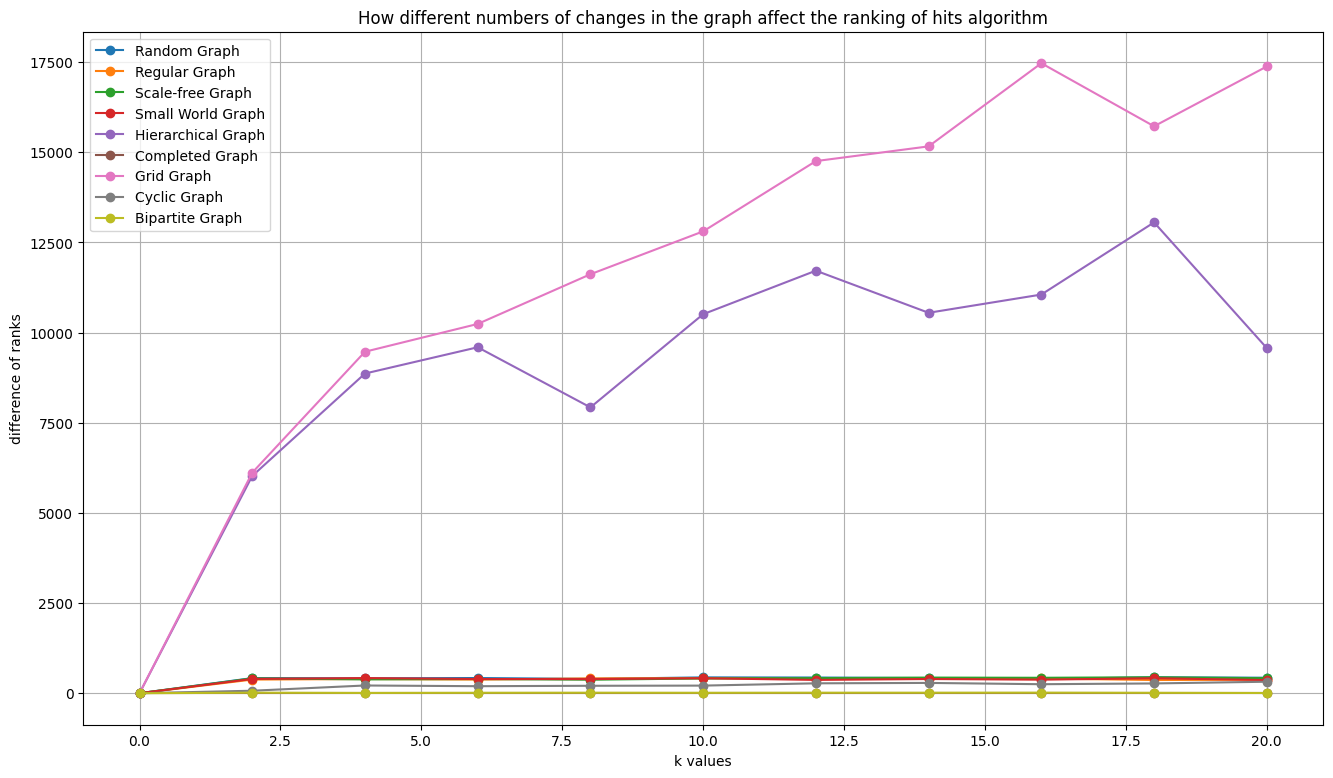

In [14]:
def make_change_add(G, k):
    G1 = G.copy()
    for i in range(k):
        choices = list(nx.non_edges(G1))
        if choices:
            edge_added = random.choice(choices)
            G1.add_edge(*edge_added)
    return G1

plot_alg(make_change_add)

##### We test changes that are only removing edges

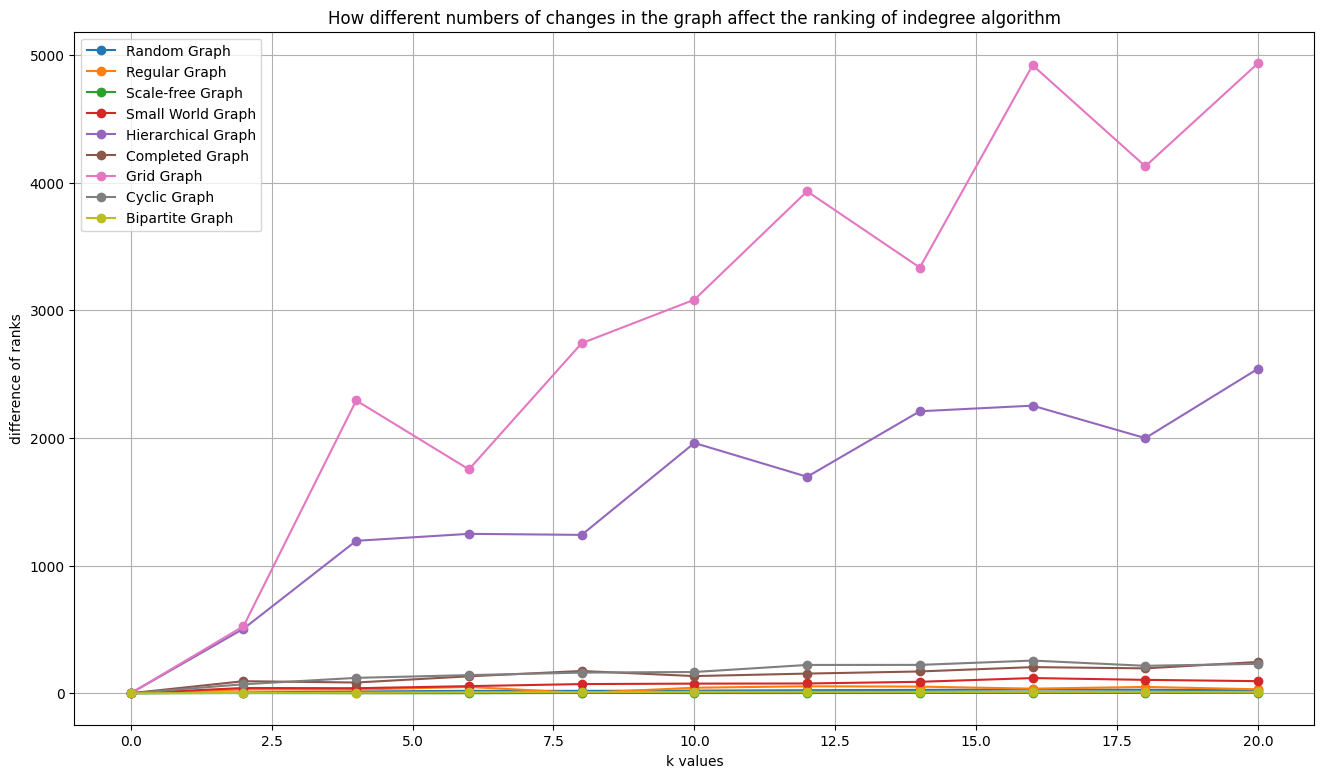

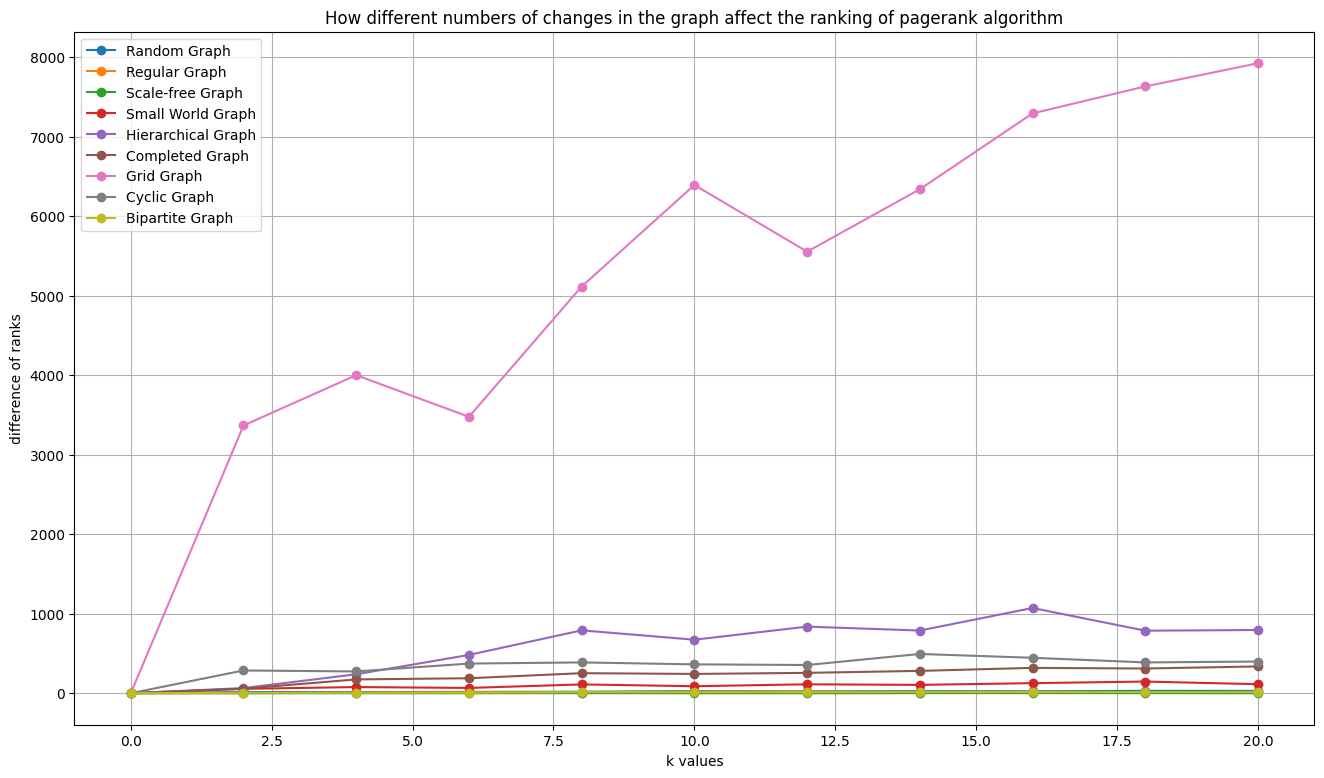

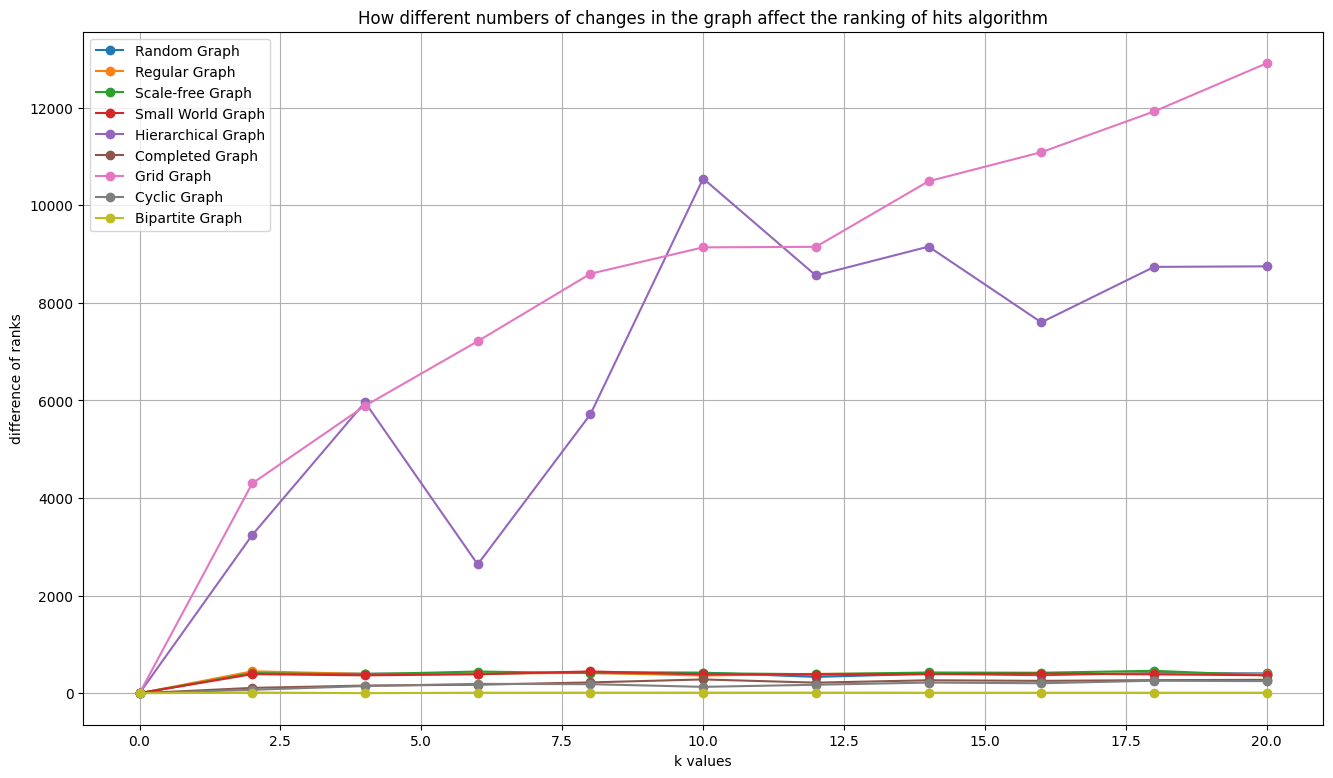

In [15]:
def make_change_remove(G, k):
    G1 = G.copy()
    for i in range(k):
        choices = list(G1.edges())
        if choices:
            edge_removed = random.choice(choices)
            G1.remove_edge(*edge_removed)
    return G1

plot_alg(make_change_remove)

#### Conclusion

From these results we can conclude that only removing links can result in less of a
difference of ranks for all three algorithms than adding links. Even though we obtained
this result, the plots remain similar in shape to the ones where we used mixed changes,
but with less difference between ranks in the case of removing links. Which means that
in both cases where we only add or remove, we have the same conclusion as before,
that HITS is the least stable and In-Degree is the most stable algorithm.